# Project 1

CS 242, Spring 2021; Instructor: Vinayak Rao 

Due: Sunday, February 28, 11:59PM (submit to Vocareum)


+ Please add you name to the top of the homework notebook
+ Any paragraph/descriptive/yes-no answers that you want to be considered for grading must be included as separate markdown cells in the Jupyter notebook (rather than as comments in the code), and these cells should accompany the associated questions: graders cannot be expected to hunt through your submission to find answers to individual questions. Please post any questions you have on piazza.

__Important__

+ For this homework you can __ONLY__ use the python libraries math, numpy, pandas and statsmodels.formula.api. 
+ Unless specified, you will lose upto 25% credit if you use loops of any kind. For full points, you should use pandas functionality, with code that returns correct answers if run on a test dataframe with the numeric entries changed.
+ A few questions have no right/wrong answers, rather we are just interested in your thought process

__Suggestion__
+ To help validate your code, create smaller versions of the provided datasets where you can calculate quantities by hand, and make sure your code agrees with these numbers

Enter your name: Joseph Klug

In [38]:
# Run this cell to load packages
%matplotlib inline
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf

In [39]:
eth_map = ['misc','black','hispanic','white']

The 2020 Democratic Party presidential primaries have seen renewed scrutiny of the New York police department's policy of [stop-and-frisk](https://en.wikipedia.org/wiki/Stop-and-frisk_in_New_York_City). The program was controversial because of suggestions of racial profiling, i.e. that some minorities were unfairly targeted by the police.

The dataset frisk.csv includes recordings of NYPD stops for a fifteen-month period in 1998 - 1999. The specific variables contained in this data are:
+ precint: [NYC precint](https://data.cityofnewyork.us/Public-Safety/Police-Precincts/78dh-3ptz) indicator, with values 1, 2, . . . , 75. 
+ eth: Ethnicity indicator, with 1 denoting Black, 2 denoting Hispanic, and 3 denoting White.
+ popl: The total population of a particular ethnicity in a given precint. 
+ crime: Crime category indicator, with 1 denoting violent crimes, 2 denoting weapons crimes, 3 denoting property crimes, and 4 denoting drug crimes.
+ stops: Number of police stops for a specific crime category among individuals of a particular ethnicity in a given precint. 
+ past: The total number of past arrests for a specific crime category among individuals of a particular ethnicity in a given precint.

1) Load the dataset from $\mathtt{frisk.csv}$. The column crime indicates 4 different kinds of crime. For simplicity, we will pool information across crime types. Produce a smaller dataframe called $\mathtt{frisk}$ without the column $\mathtt{crime}$, and with $\mathtt{stops}$ and $\mathtt{popl}$ giving the total number of stops and past arrests for that $\mathtt{(precinct,eth)}$ irrespective of crime type. $\mathtt{frisk}$ __must__ have $\mathtt{precinct}$ and $\mathtt{eth}$ as a column names. Print the first 10 rows. $\ $   (5pts)

__ (You code should not use for loops, nor depend on the ordering of the rows) __

<code>
     precinct  eth    popl  stops  past
0           1    1    1720    202   980
1           1    2    1368    102   295
2           1    3   23854     81   381
3           2    1    2596    132   753
4           2    2    6844    144   557
5           2    3    9379     71   431
</code>

In [83]:
df = pd.read_csv('frisk.csv')
frisk = df.groupby(['precinct', 'eth']).agg({'popl':'max', 'stops':'sum', 'past':'sum'}).reset_index()
print(frisk.head(10))

   precinct  eth   popl  stops  past
0         1    1   1720    202   980
1         1    2   1368    102   295
2         1    3  23854     81   381
3         2    1   2596    132   753
4         2    2   6844    144   557
5         2    3   9379     71   431
6         3    1   2092    752  2188
7         3    2   3633    441   627
8         3    3  56304    410  1238
9         4    1   5699    385   471


In [41]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


2a) Fit a straight line __passing through the origin__ for this data, with $\mathtt{stops}$ as output and $\mathtt{popl}$ as input. Report its slope, saving it in the variable $\mathtt{slope}$.

In [42]:
mod = smf.ols(formula='stops~popl-1', data=frisk).fit()
slope = mod.params[0]
print(slope)

0.013380758804351547


In [43]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


2b) The slope of the line gives the increase in the number of stops if the population increases by 1 (or put another way, the average number of stops a new person would experience in that period). Under this model, what happens to the number of stops if the population doubles?  $\ $ (1pt)

The stops will also double because the slope is constant and the line passes through the origin.

2c) Plot a scatter plot of population of precinct (x-axis) vs number of stops in that precinct (y-axis), and add the line from the previous cell.    $\ $ (3pts)

(321.0, 184345.0)

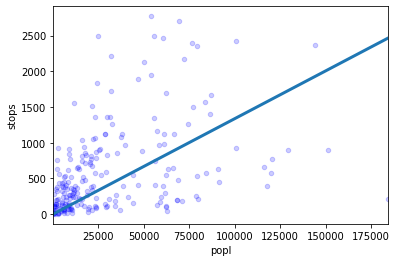

In [44]:
ax = frisk.plot.scatter(x='popl', y='stops', s=20, color='blue', alpha=0.2)
xmin, xmax = frisk.popl.min(), frisk.popl.max()
x = np.arange(xmin, xmax)
ax.plot(x,x*slope, linewidth=3)
ax.set_xlim([xmin,xmax])

3a) Now fit a _general_ straight line (i.e. not necessarily passing through the origin) for this data, again with $\mathtt{stops}$ as output and $\mathtt{popl}$ as input, and report the parameters as $\mathtt{slope}$ and $\mathtt{intercept}$.

In [45]:
mod = smf.ols(formula='stops~popl', data=frisk).fit()
intercept, slope = mod.params
print(intercept, slope)

339.5071828319833 0.008124416863261274


In [46]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


3b) Create another scatterplot of the data with this line plotted.  $\ $ (3pts)

(321.0, 184345.0)

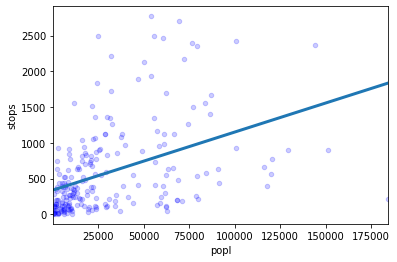

In [47]:
ax = frisk.plot.scatter(x='popl', y='stops', s=20, color='blue', alpha=0.2)
xmin, xmax = frisk.popl.min(), frisk.popl.max()
x = np.arange(xmin, xmax)
ax.plot(x,intercept+x*slope, linewidth=3)
ax.set_xlim([xmin,xmax])

3c) How do you interpret the slope of this new line? Does this new model assume that the number of stops doubles if the population doubles? Briefly explain your answer.   $\ $ (2pts)

__Note:__ The intercept of this line gives the number of stops when the population equals 0. Clearly, this does not make any sense. However, in practice, we are not interested in such input values. Including the intercept allows us to better fit the data for useful input values. It is important to not blindly extrapolate to values where the model is unreasonable, or where we haven't seen any data.

The number of stops no longer doubles as the population doubles because the intercept is not 0. 

The previous model assumes the numbers of stops in a precinct depends only on the precinct's population. Another approach is to model the number of stops in a precinct as a function of the precinct's crime rate. As a proxy for crime rate, we will use the number of arrests in the previous year (column $\mathtt{past}$).

4a) Fit a linear function with $\mathtt{past}$ as input and $\mathtt{stops}$ as output, and report the slope and intercept as $\mathtt{slope}$ and $\mathtt{intercept}$. $\ $ (2pts)

In [48]:
mod = smf.ols(formula='stops~past', data=frisk).fit()
intercept, slope = mod.params
print(slope, intercept)

0.40416481103999674 159.196710050712


In [49]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


4b) Plot a scatterplot of $\mathtt{past}$ vs $\mathtt{stops}$, along with the fitted line. What is the interpretation of the slope of this line?  $\ $ (3pts)

(16.0, 5667.0)

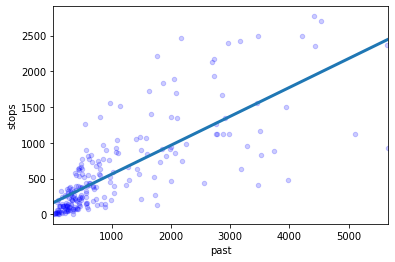

In [50]:
ax = frisk.plot.scatter(x='past', y='stops', s=20, color='blue', alpha=0.2)
xmin, xmax = frisk.past.min(), frisk.past.max()
x = np.arange(xmin, xmax)
ax.plot(x,intercept+x*slope, linewidth=3)
ax.set_xlim([xmin,xmax])

4c) Briefly suggest any problems with using past arrests as a proxy for crime rate.  $\ $ (1pt)

Using past arrests as a proxy for crime rate can cause more arrests in crime heavy areas, creating a cycle of arrests for the people in these areas leading to even higher crime rates and poverty rates.

5a) In general, we expect the number of stops to depend on both population size and crime rate. Fit a linear model with $\mathtt{stops}$ as the output, and both $\mathtt{popl}$ __and__ $\mathtt{past}$ as inputs. Report the fitted parameters as intercept, slope\_popl and slope\_past. $\ $ (2pts)

In [51]:
mod = smf.ols(formula='stops~popl+past', data=frisk)
rslt=mod.fit()
intercept, slope_popl, slope_past= rslt.params
print(rslt.params)

Intercept    104.501231
popl           0.002941
past           0.371986
dtype: float64


In [52]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


5b)This model breaks down the number of stops as dependent on two factors, population size and crime rate. The coefficient associated with $\mathtt{popl}$ gives the increase in the number stops if $\mathtt{popl}$ increases by one, _keeping $\mathtt{past}$ fixed_ (i.e. controlling for crime rate). What is the interpretation of the coefficient of $\mathtt{past}$? $ $ (1pts)

The coefficient past represents the rate at which stops increase given a fixed variable popl.

6a) Again produce scatterplots of popl vs stops and past vs stops, now coloring each point according to the value of eth. Use a clear colormap (e.g. 'gist_rainbow') as an argument for scatter (6pts)

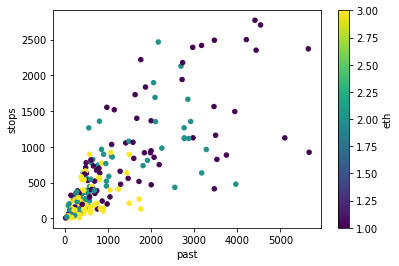

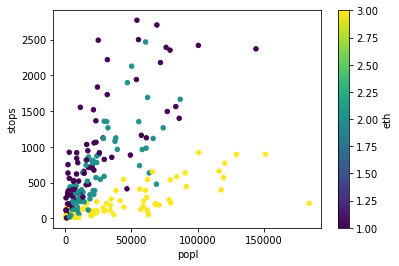

In [89]:
ax1 = frisk.plot.scatter(x='past', y='stops', c='eth', colormap='viridis', sharex=False)
ax2 = frisk.plot.scatter(x='popl', y='stops', c='eth', colormap='viridis', sharex=False)

7a) Create a new dataframe called eth\_count from frisk with 3 rows called 'black', 'hispanic' and 'white', and three columns 'stops', 'popl' and 'past'. Each element of $\mathtt{stops}$ should give the total number of stops for the 3 groups, and similarly for $\mathtt{popl}$ and $\mathtt{past}$. $\ $ (4pts)

In [54]:
eth_count = frisk.drop(columns='precinct').groupby('eth').agg({'popl':'sum', 'stops':'sum', 'past':'sum'}).reset_index()
eth_count['eth'] = eth_map[1:]
eth_count = eth_count.set_index('eth')
print(eth_count)

             popl  stops    past
eth                             
black     1865895  69823  125719
hispanic  1732269  44623   74898
white     3175354  16974   35922


In [55]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


7b) Divide each column of eth_count by its sum, producing a new dataframe called eth_prop. Here, each element of $\mathtt{stops}$ should give the proportion of stops for the 3 groups, and similarly for popl and past. $\ $ (2pts)

In [56]:
eth_prop = eth_count.div(eth_count.sum(), axis=1)
eth_prop

,popl,stops,past
eth,,,
black,0.275469,0.531297,0.531494
hispanic,0.255741,0.339545,0.316641
white,0.468789,0.129158,0.151865


In [57]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


8a) Creat a barplot from eth_prop consisting of 3 groups, 'black', 'hispanic' and 'white'. Each group should have 3 different colored bars giving the proportion that group forms of total stops, population and past arrests. $\ $ (3pts)

<AxesSubplot:xlabel='eth'>

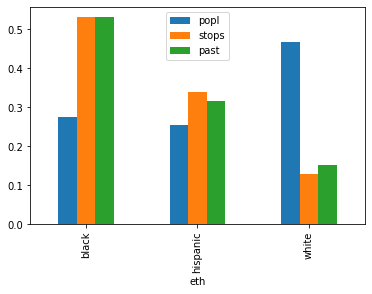

In [58]:
eth_prop.plot.bar()

8b) Creat a barplot from eth_prop consisting of 3 groups, 'stops', 'popl' and 'past'. Each group should have 3 different colored bars giving the proportion of blacks, hispanics and whites for that group (this is just a reorganization of the previous barplot).  $\ $ (3pts)

<AxesSubplot:>

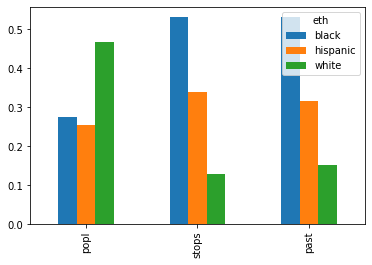

In [59]:
eth_prop.transpose().plot.bar()

Looking at the plots above, an opponent of stop-and-frisk would claim the the number of times a black or hispanic person was stopped was disproportionate to their population size. A supporter of the policy would argue that the stops are proportionate with past arrests (or crime-rate). To better understand this, we need to simultaneously understand the effects of both population and crime rate.

9) Fit separate linear models with stops as output, and popl and past as input for each ethnic group. Report the parameters. It is difficult to compare slopes if each model has a different intercept, therefore we will force them to pass through the origin. Save the parameters as black_past, black_popl, hisp_past, hisp_popl, white_past and white_popl. Briefly summarize the results. (5pts)

In [63]:
frisk_black = frisk.loc[frisk.eth==1]
frisk_hisp = frisk.loc[frisk.eth==2]
frisk_white = frisk.loc[frisk.eth==3]
black_past, black_popl = smf.ols(formula='stops~past+popl-1', data=frisk_black).fit().params
hisp_past, hisp_popl = smf.ols(formula='stops~past+popl-1', data=frisk_hisp).fit().params
white_past, white_popl = smf.ols(formula='stops~past+popl-1', data=frisk_white).fit().params

In [103]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


Instead of three models on three datasets (for each group) it is more informative to fit a single model on a single dataset that also includes group information.

10) Towards this, first add 3 columns to $\mathtt{frisk}$, 'black', 'hispanic' and 'white'. Elements of these should be 0 unless the row belongs to the corresponding column, in which case it should be 1 (e.g. if eth = 1, these columns have values (1,0,0) respectively). This is a one-hot encoding of the column $\mathtt{eth}$. 

 Fit a linear model with $\mathtt{stops}$ as output, and $\mathtt{popl, past, black}$ and $\mathtt{hisp}$ as inputs. Report the parameters as intercept, slope_past, slope_popl, slope_black and slope_hisp.  $\ $ (5pts)

In [34]:
frisk = frisk.join(pd.get_dummies(frisk.eth).rename(columns={1:'black', 2:'hispanic', 3:'white'}))
mod = smf.ols(formula='stops~popl+past+black+hispanic', data=frisk).fit()
intercept, slope_popl, slope_past, slope_black, slope_hisp = mod.params
print(mod.params)

Intercept   -156.289946
popl           0.006039
past           0.265046
black        492.745874
hispanic     347.103798
dtype: float64


In [454]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


__Note__: We are not using the column 'white' as an input, rather this is taken as default, so that the slope and intercepts correspond to the white population. The coefficient of black gives the change in the number of stops if that population were a black instead of white, for the _same_ population size and crime rate. Similarly for the coefficient of hispanic. The current dataset would have no evidence of police bias if these two coefficients were close to 0.

11) Comment briefly on what you think the coefficients of the previous regressions tell you. $\ $ (2pts)

This shows that there is a lot of bias in the stop and frisk system that New York uses. Because the coefficients are so high for slope_black and slope_hisp, this means that police are disproportianately stopping minority groups.

As a last (and simpler) model, we note that with count data (e.g. population size, number of stops etc), it is often more convenient to work with log-counts rather than counts. 

12a) Add 3 new columns to frisk, $\mathtt{logstops, logpast}$ and $\mathtt{logpopl}$ obtained by taking logarithms of the corresponding columns. How many zeroes are present in columns $\mathtt{logstops, logpast}$ and $\mathtt{logpopl}$? To avoid taking logs of 0, you can add a small number (0.001) to these columns before taking log. 

Fit a straight line with $\mathtt{logstops}$ as output and $(\mathtt{logpopl, logpast})$ as inputs. Report its parameters as intercept, slope_logstops and slope_logpopl. $\ $ (5pts)


__Note:__ the coefficient in this log-log model has a slightly more complicated interpretation, giving the percent change in output if the input changes by 1 percent. It economics, this coefficient is called _elasticity_.

In [87]:
frisk['stops'] += .001
frisk['past'] += .001
frisk['popl'] += .001
print("Number of Zeros:\n"+str((frisk.loc[:,'popl':'past'] == 0).astype(int).sum(axis=0)))
frisk['logstops'] = np.log(frisk.stops)
frisk['logpast'] = np.log(frisk.past)
frisk['logpopl'] = np.log(frisk.popl)
mod = smf.ols(formula='logstops~logpopl+logpast', data=frisk).fit()
intercept, slope_logpopl, slope_logpast = mod.params
mod.params

Number of Zeros:
popl     0
stops    0
past     0
dtype: int64


Intercept   -1.398852
logpopl      0.181298
logpast      0.841843
dtype: float64

In [65]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###



12b) Plot a scatter plot of log-population of precinct (x-axis) vs log-number of stops in that precinct (y-axis). 
  $\ $ (2pts)

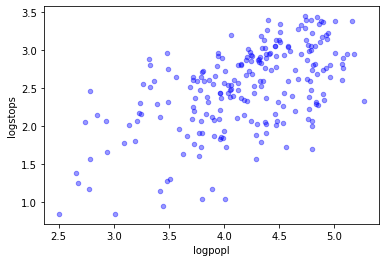

In [457]:
ax = frisk.plot.scatter(x='logpopl', y='logstops', c='blue', alpha=0.4)

13) We have 4 interesting models for perdicting $\mathtt{stops}$, with inputs $\mathtt{(popl), (past), (popl,past)}$ and $\mathtt{(popl,past,black,hist)}$. Our last model predicts log-stops from log-popl and log-past. We want to decide which one is most appropriate. We do this using cross-validation (see the slides) $\ $ (15 pts)
+ Recall we have 75 precincts. For each 'fold' of cross-validation, we will hold out 5 precincts, train the models on the rest, and then test on 5 held-out precincts (15 datapoints). Thus there will be a total of 75/5 = 15 folds.
+ For each fold and for each model, calculate the sum-squared-error between the predicted number of stops for the test data, and the true number of stops. For each model, store the parameters and sum-squared errors as a dataframe with 15 rows. Call these dataframes crossval1, crossval2,... crossval5.

__Note__: 
+ _the last model predicts logstops, not stops. To avoid comparing apples and oranges, convert its output to stops before computing sum-squared-error._

+ You can use a for loop over the cross-validation folds.

In [505]:
###   stops ~ popl
crossval1 = pd.DataFrame(columns=['intercept', 'slope', 'sse'])
for i in range(15):
    data = frisk.drop(frisk.index[15*i : 15*(i+1)])
    test = frisk.iloc[15*i : 15*(i+1)]
    mod = smf.ols('stops~popl', data=data).fit()
    intercept, slope = mod.params
    sse = ((mod.predict(test.popl) - test.stops)**2).sum()
    crossval1 = crossval1.append(pd.DataFrame([[intercept, slope, sse]], columns=['intercept', 'slope', 'sse']))
#print(crossval1)

###   stops ~ past
crossval2 = pd.DataFrame(columns=['intercept', 'slope', 'sse'])
for i in range(15):
    data = frisk.drop(frisk.index[15*i : 15*(i+1)])
    test = frisk.iloc[15*i : 15*(i+1)]
    mod = smf.ols('stops~past', data=data).fit()
    intercept, slope = mod.params
    sse = ((mod.predict(test.past) - test.stops)**2).sum()
    crossval2 = crossval2.append(pd.DataFrame([[intercept, slope, sse]], columns=['intercept', 'slope', 'sse']))
#print(crossval2)

###   stops ~ popl, past
crossval3 = pd.DataFrame(columns=['intercept', 'slope_past', 'slope_popl', 'sse'])
for i in range(15):
    data = frisk.drop(frisk.index[15*i : 15*(i+1)])
    test = frisk.iloc[15*i : 15*(i+1)]
    mod = smf.ols('stops~past+popl', data=data).fit()
    intercept, slope_past, slope_popl = mod.params
    sse = ((mod.predict(test[['past', 'popl']]) - test.stops)**2).sum()
    crossval3 = crossval3.append(pd.DataFrame([[intercept, slope_past, slope_popl, sse]], columns=['intercept', 'slope_past', 'slope_popl', 'sse']))
#print(crossval3)

###   stops ~ popl, past, black, hisp
crossval4 = pd.DataFrame(columns=['intercept', 'slope_past', 'slope_popl', 'slope_black', 'slope_hisp', 'sse'])
for i in range(15):
    data = frisk.drop(frisk.index[15*i : 15*(i+1)])
    test = frisk.iloc[15*i : 15*(i+1)]
    mod = smf.ols('stops~past+popl+black+hisp', data=data).fit()
    intercept, slope_popl, slope_past, slope_black, slope_hisp = mod.params
    sse = ((mod.predict(test[['past', 'popl', 'black', 'hisp']]) - test.stops)**2).sum()
    crossval4 = crossval4.append(pd.DataFrame([[intercept, slope_past, slope_popl, slope_black, slope_hisp, sse]], 
                                              columns=['intercept', 'slope_past', 'slope_popl', 'slope_black', 'slope_hisp', 'sse']))
#print(crossval4)

###   logstops ~ logpast
crossval5 = pd.DataFrame(columns=['intercept', 'slope', 'sse'])
for i in range(15):
    data = frisk.drop(frisk.index[15*i : 15*(i+1)])
    test = frisk.iloc[15*i : 15*(i+1)]
    mod = smf.ols('logstops~logpast+logpopl', data=data).fit()
    intercept, slope_logpast, slope_logpopl = mod.params
    sse = ((10**mod.predict(test[['logpast', 'logpopl']]) - test.stops)**2).sum()
    crossval5 = crossval5.append(pd.DataFrame([[intercept, slope, sse]], columns=['intercept', 'slope', 'sse']))
#print(crossval5)

14a) Create a plot consisting of 5 boxplots, giving the test sum-squared errors for the 5 models across all the folds. What do you think the ordering of models is in terms of predictive performance, explaining clearly what criteria you used to order them.  $\ $ (5pts)

<AxesSubplot:>

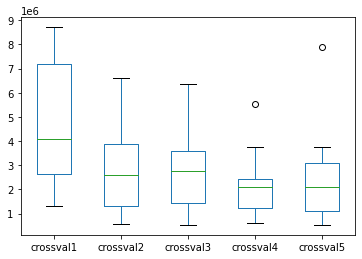

In [518]:
temp = pd.DataFrame()
temp['crossval1'], temp['crossval2'], temp['crossval3'], temp['crossval4'], temp['crossval5'] = crossval1.sse, crossval2.sse, crossval3.sse, crossval4.sse, crossval5.sse
temp.plot.box()

The models with the best predicrave performance will have a low sse across all folds and will have a low varience from the mean. Using these parameters we can determine that crossval4 will have the best overall performance, which makes sense because crossval4 has the most paramaters for predicting stops.

14b) Create a plot consisting of 2 boxplots, the coefficients of the parameters 'black' and 'hispanic' for the 4th model across all folds. Also summarize it using the describe method. Do you think the estimates vary a lot across different folds?  $\ $ (6 pts)

,slope_black,slope_hisp
count,15.000000,15.000000
mean,491.861998,346.578121
std,19.478170,16.489292
min,455.781902,318.326872
25%,482.218135,334.868262
50%,487.187266,341.238642
75%,507.122379,360.467200
max,525.430667,373.690442


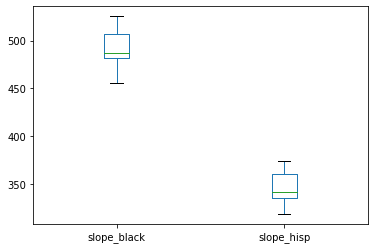

In [519]:
crossval4[['slope_black', 'slope_hisp']].plot.box()
crossval4[['slope_black', 'slope_hisp']].describe()

It seems that the estimates do not vary greatly across the different folds. The ranges never overlap, which can be a good indicator that there is too much varience in the data, another good indicator is the lack of outliers.

__Conclusion__: A thorough assessment of the stop-and-frisk policy requires for sophisticated modeling (e.g. nonlinearities and interaction terms), more kinds of data (e.g. what proportion of stopped people were found to be innocent? Did the policy actually result in a reduction in crime? Is any reduction in crime worth the loss in civil liberties?). See e.g. [here](https://www.nyclu.org/en/stop-and-frisk-data). Nevertheless, it is widely agreed now that this was an unfair and harmful policy. If you are interested, [here](https://www.huffpost.com/entry/nypd-stop-and-frisks-15-shocking-facts_n_1513362) is an article from the left, and [here](https://www.nationalreview.com/2018/01/new-york-city-stop-and-frisk-crime-decline-conservatives-wrong/) is one from the right.